In [2]:
%load_ext autoreload
%autoreload 2

import sys
import os
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

sys.path.append("JohnnyBotSimulator.")


# Dynamically determine the path to the JohnnyBotSimulator directory
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.append(parent_dir)

from Dynamics.JohnnyDynamics import JohnnyDynamics
from Controller.JohnnyControl_ver1 import JohnnyController
from Estimation.PNT_Estimation import PNT_Estimation


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ModuleNotFoundError: No module named 'Dilution_of_Precision'

In [25]:
# simple controller test 
def test_controller():
    # Set up the dynamics
    controller1 = JohnnyController()
    controller1.kp =1
    controller1.kd = 1.2
    controller1.desired_state = jnp.array([0,0,0,0])
    controller1.state0 = jnp.array([10,10,0,0])
    controller1.plotter.source= [10,0]
    controller1.plotter.source_gain= 5
    controller1.simulate()
    controller1.plotter.title = "Simple Controller Test"
    controller1.plot()
    plt.show()
   

Simulating
Position:  [0 0]
Position error:  [0 0]
Control input:  [-1.2  0. ]
Position:  [ 9.99994 10.     ]
Position error:  [ -9.99994 -10.     ]
Control input:  [ -9.98554 -10.     ]
Position:  [9.99932072 9.9995    ]
Position error:  [-9.999321 -9.9995  ]
Control input:  [-9.865094 -9.8795  ]
Position:  [9.99770891 9.99800602]
Position error:  [-9.997709 -9.998006]
Control input:  [-9.745102 -9.759452]
Position:  [9.9951166 9.9955301]
Position error:  [-9.995116 -9.99553 ]
Control input:  [-9.625567 -9.639863]
Position:  [9.99155574 9.99208421]
Position error:  [-9.991556  -9.9920845]
Control input:  [-9.5065   -9.520739]
Position:  [9.98703829 9.9876803 ]
Position error:  [-9.987039 -9.98768 ]
Control input:  [-9.387905 -9.402086]
Position:  [9.98157611 9.98233024]
Position error:  [-9.981576 -9.98233 ]
Control input:  [-9.269788 -9.283911]
Position:  [9.97518105 9.97604588]
Position error:  [-9.975181 -9.976046]
Control input:  [-9.152155 -9.166219]
Position:  [9.96786489 9.9688

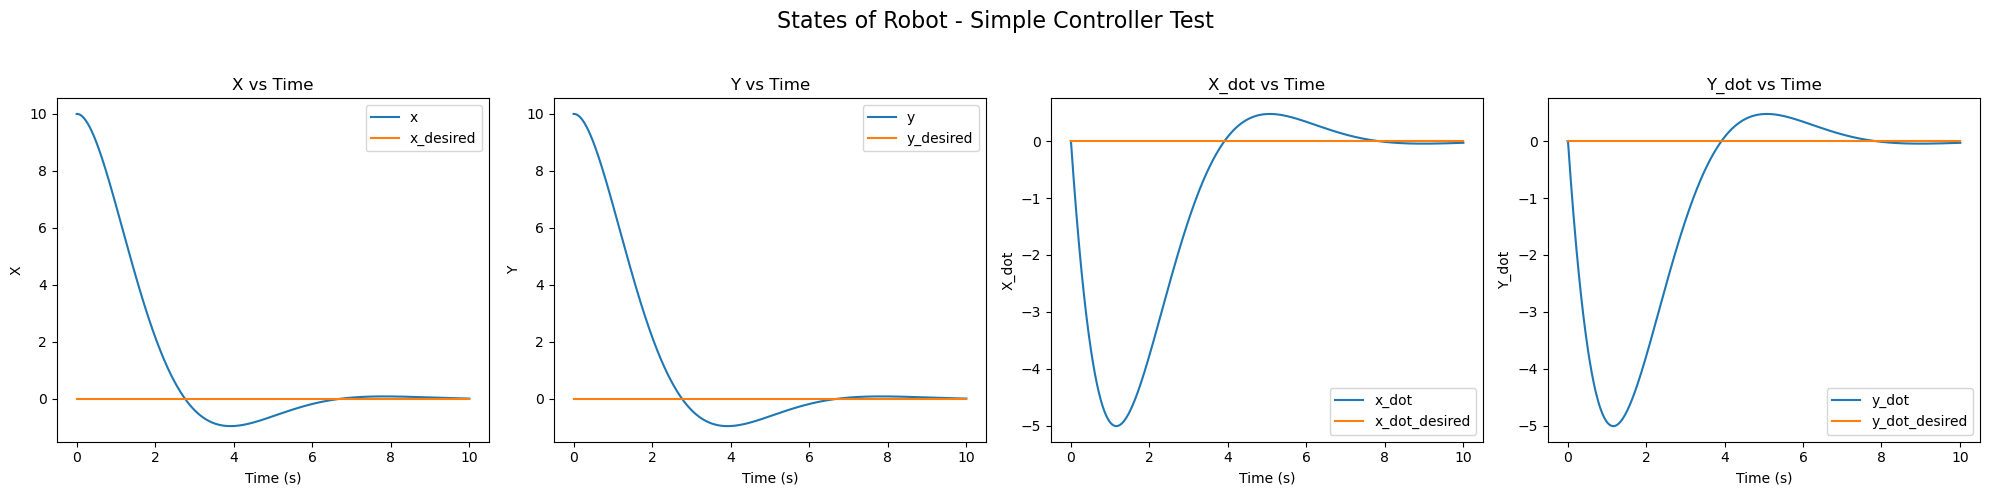

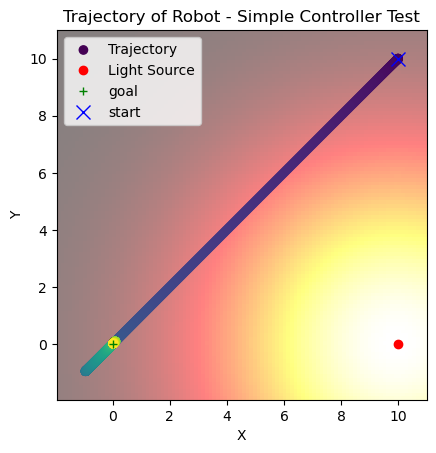

In [26]:
test_controller()

In [34]:
def test_CVX_controller():
    # Set up the dynamics
    controller1 = JohnnyController()
    controller1.kp =3
    controller1.kd = 1.2
    controller1.desired_state = jnp.array([0,0,0,0])
    controller1.tf = 20
    controller1.state0 = jnp.array([10,10,0,1.5])
    controller1.plotter.source= [10,0]
    controller1.plotter.source_gain= 0
    controller1.CVX_controller_double_integrator()
    controller1.plotter.title = "CVX controller"
    controller1.plotter.controls_plot_on= True
    controller1.plot()
    plt.show()

c:\Users\fatho\anaconda3\lib\site-packages\cvxpy\problems\problem.py:158: UserWarning: Objective contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn("Objective contains too many subexpressions. "


Optimization successful!
Optimal cost: 51548.70199239559
Optimal control inputs: [[-2.00000002e+00 -2.00010866e+00]
 [-2.00000002e+00 -2.00010829e+00]
 [-2.00000002e+00 -2.00010792e+00]
 ...
 [ 4.82399445e-09  1.19614769e-08]
 [ 2.44367585e-09  6.05928735e-09]
 [ 0.00000000e+00  0.00000000e+00]]
Optimal states: [[ 1.00000000e+01  9.99999636e+00 -2.41115272e-09  1.49998910e+00]
 [ 1.00000000e+01  1.00149926e+01 -2.00000051e-02  1.47997715e+00]
 [ 9.99980000e+00  1.00297887e+01 -4.00000077e-02  1.45996524e+00]
 ...
 [ 6.62906317e-08  1.64372806e-07 -2.45094353e-08 -6.07736386e-08]
 [ 6.60455373e-08  1.63765068e-07 -2.44611954e-08 -6.06540232e-08]
 [ 6.58009254e-08  1.63158527e-07 -2.44367586e-08 -6.05934301e-08]]
plotting


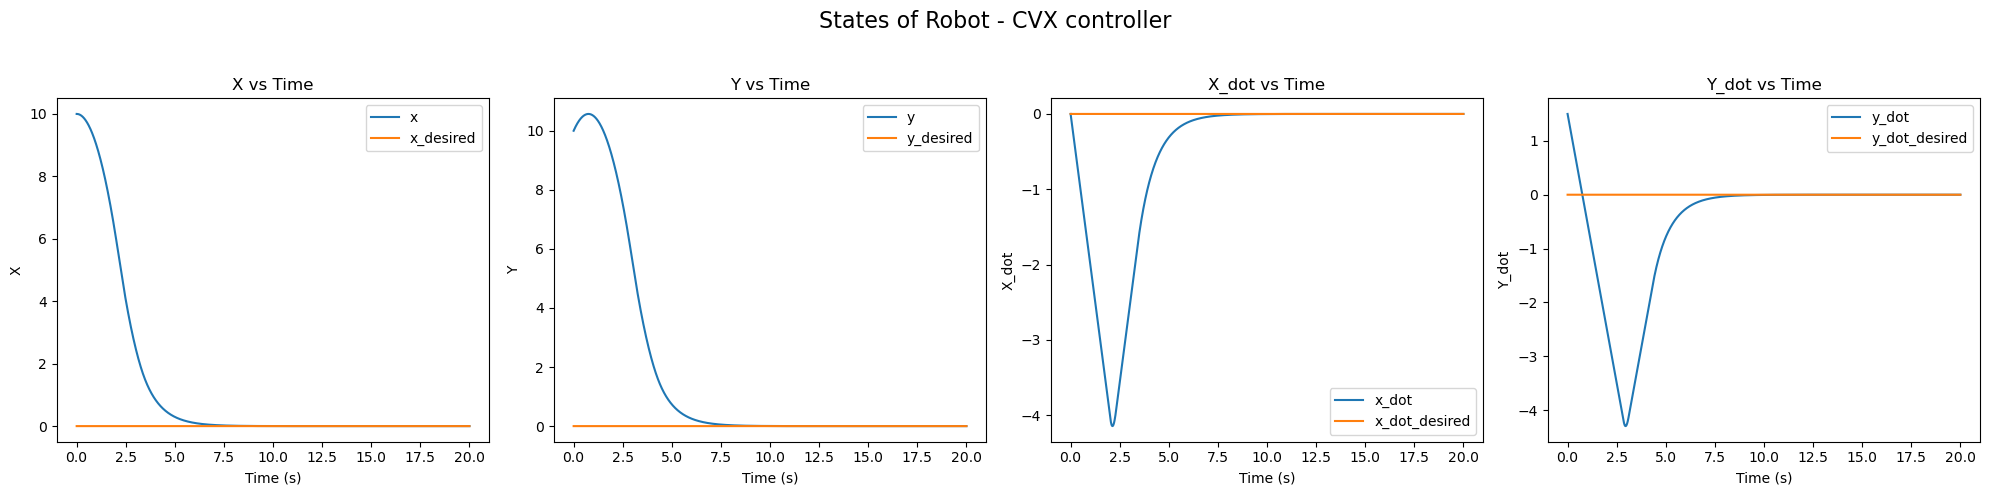

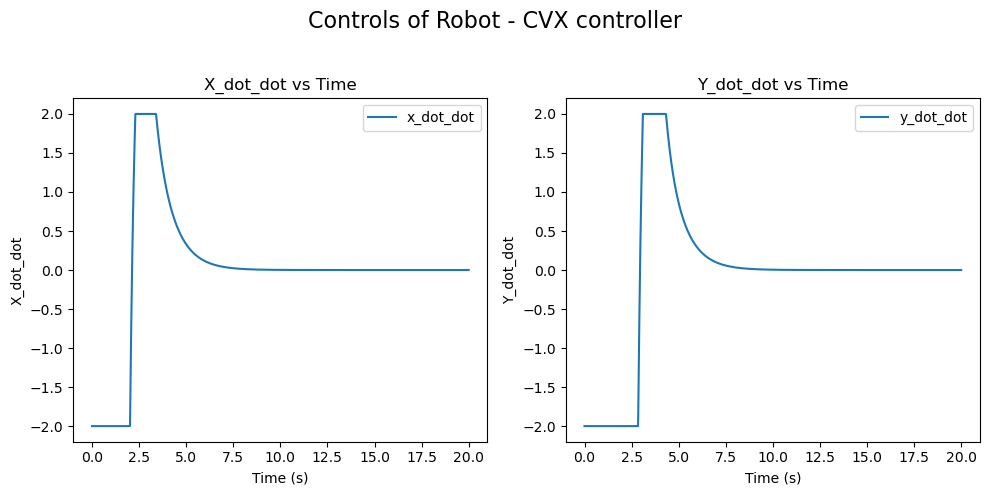

c:\Users\fatho\PythonStuff\JohnnyBot\JohnnyBotSimulator\Plotting\Plotting.py:47: RuntimeWarning: divide by zero encountered in true_divide
  intensity = np.exp(-dist**2 / (2 * self.source_gain**2))


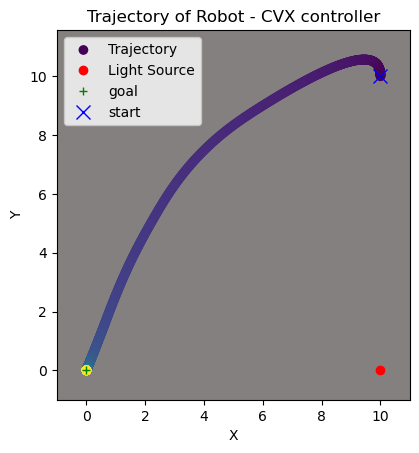

In [35]:
test_CVX_controller()

In [36]:
def test_CVX_MPC():
    # Set up the dynamics
    controller1 = JohnnyController()
    controller1.kp =3
    controller1.kd = 1.2
    controller1.desired_state = jnp.array([0,0,0,0])
    controller1.tf = 20
    controller1.state0 = jnp.array([10,10,0,1.5])
    controller1.plotter.source= [10,0]
    controller1.plotter.source_gain= 0
   
    controller1.MPC_horizon = 50

    controller1.CVX_controller_MPC()
    controller1.plotter.title = "CVX MPC"
    controller1.plot()
    plt.show()

[10.  10.   0.   1.5]
Step 0: Optimization successful!
Optimal cost: 12264.654392305643
[10.    10.015 -0.02   1.48 ]
Step 1: Optimization successful!
Optimal cost: 12274.812161488731
[ 9.99979999 10.02979809 -0.03999688  1.46000321]
Step 2: Optimization successful!
Optimal cost: 12284.550926645159
[ 9.99940003 10.04439624 -0.05999376  1.44000641]
Step 3: Optimization successful!
Optimal cost: 12293.870636815027
[ 9.99880013 10.05879444 -0.07999064  1.42000962]
Step 4: Optimization successful!
Optimal cost: 12302.770682558175
[ 9.99800028 10.0729927  -0.09998752  1.40001282]
Step 5: Optimization successful!
Optimal cost: 12311.2504506547
[ 9.99700049 10.08699102 -0.11998441  1.38001603]
Step 6: Optimization successful!
Optimal cost: 12319.309215963172
[ 9.99580076 10.1007894  -0.1399813   1.36001923]
Step 7: Optimization successful!
Optimal cost: 12326.946472262007
[ 9.99440108 10.11438783 -0.15997819  1.34002244]
Step 8: Optimization successful!
Optimal cost: 12334.161703106702
[ 9.99

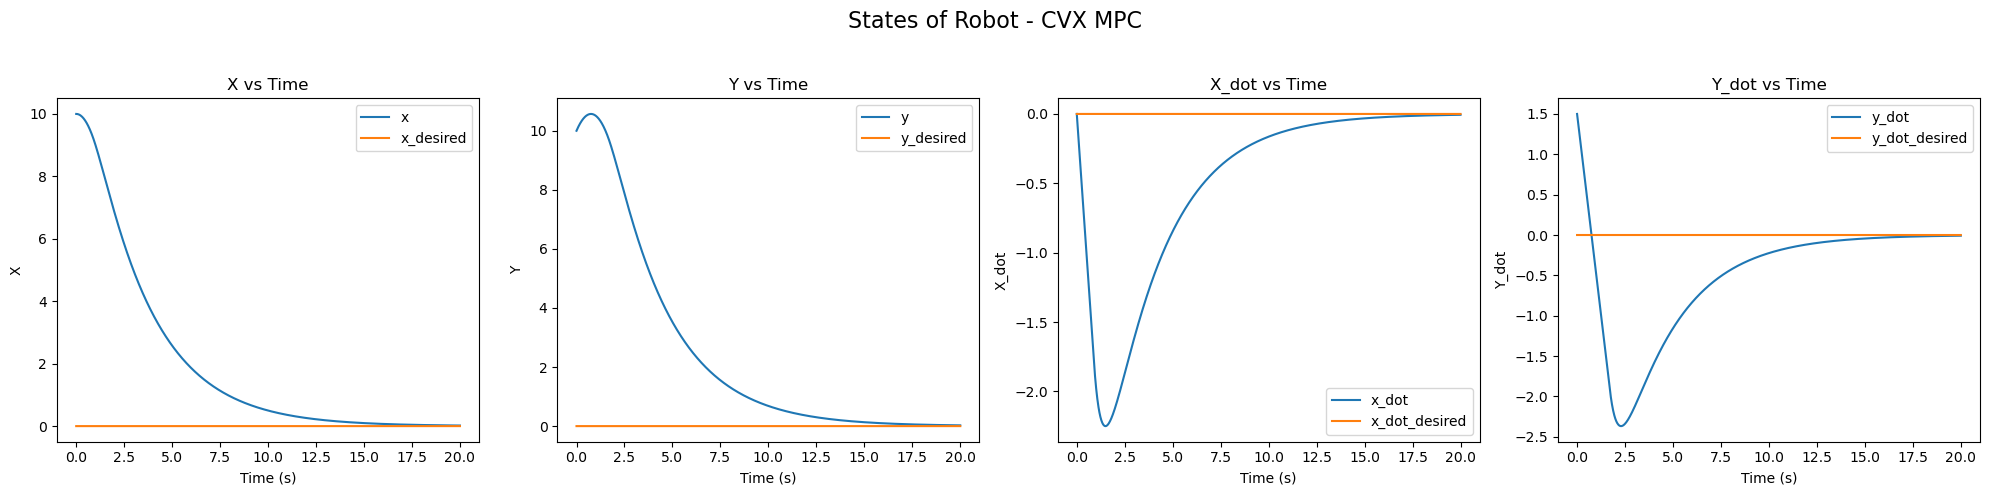

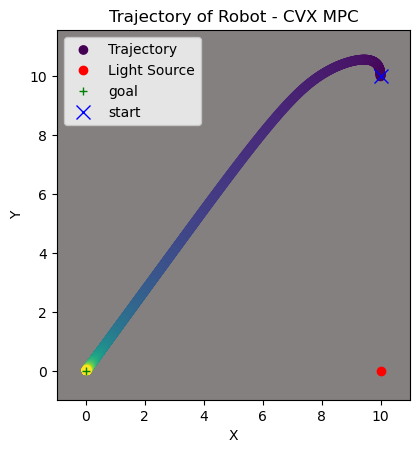

In [37]:
test_CVX_MPC()